In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq, ifft

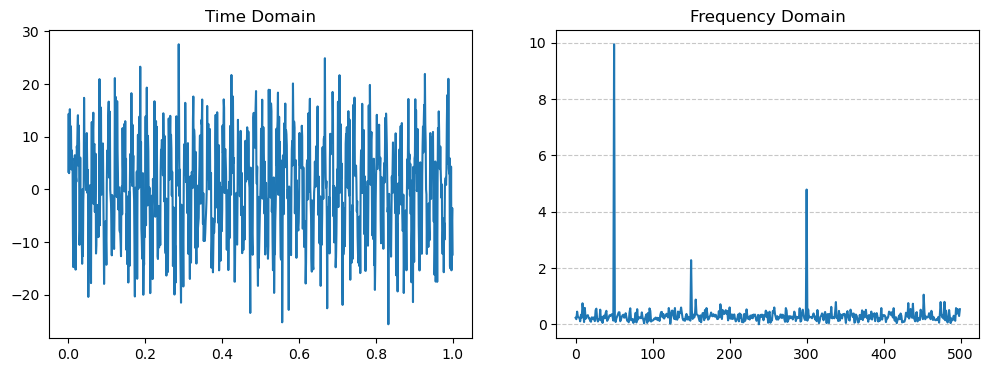

In [34]:

T = 1/1000
t = np.arange(0, 1, T)
f1, f2, f3 = 50, 150, 300
alpha = 2 * np.pi * t
y1, y2, y3 = 10 * np.sin(alpha * f1), 2* np.sin(alpha * f2), 5* np.sin(alpha * f3)
noise = np.random.normal(0, 5, len(t))
signal = y1 + y2 + y3 + noise

# window = np.hanning(1/T)
# signal = signal * window

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
# plt.plot(t[:500], signal[:500])
plt.plot(t, signal)
plt.title('Time Domain')


Y = fft(signal)
frequencies = fftfreq(len(t), T)
Y = Y[:len(frequencies)//2]
frequencies = frequencies[:len(frequencies)//2]
Y_magnitude = (2 / (1/T)) * np.abs(Y)

plt.subplot(1, 2, 2)
plt.plot(frequencies, Y_magnitude)
plt.title('Frequency Domain')

plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.savefig("../../images/transform.png")



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/tmp/ipykernel_3497/1269718638.py:36: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


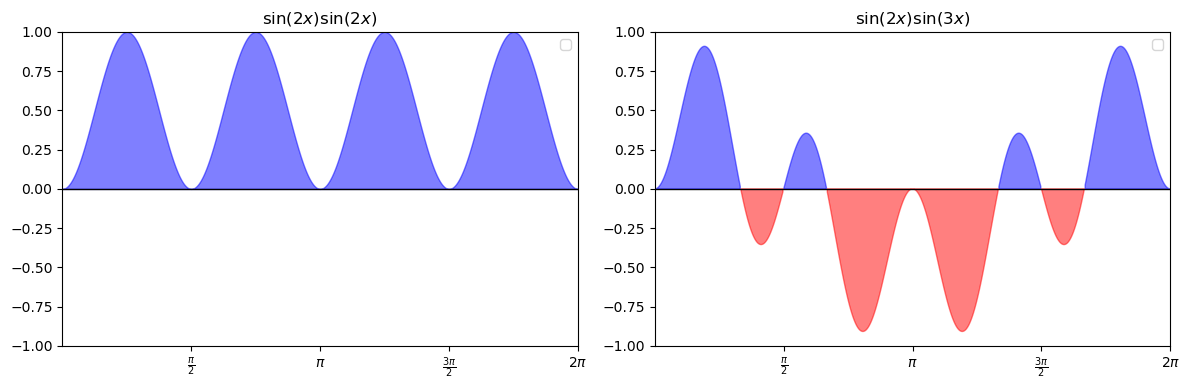

In [70]:
x = np.linspace(0, 10, 1000)

# Calculate the y values for both plots
y1 = np.sin(2*x) * np.sin(2*x)
y2 = np.sin(2*x) * np.sin(3*x)

ys = [y1, y2]

# Create the figure and axes for the plots
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

for i in range(2):
    ax[i].fill_between(x, ys[i], where=(ys[i] >= 0), color='blue', alpha=0.5)
    ax[i].fill_between(x, ys[i], where=(ys[i] < 0), color='red', alpha=0.5)
    ax[i].axhline(0, color='black', linewidth=1)  # Solid x-axis
    ax[i].legend()
    ax[i].set_ylim(-1, 1)
    ax[i].set_xlim(0, 2*np.pi)
    ax[i].set_xticks([np.pi/2, np.pi, 3*np.pi/2, 2*np.pi])
    ax[i].set_xticklabels([r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$', r'$2\pi$'])


# Plot sin(2x)*sin(2x) on the first subplot
ax[0].plot(x, y1, label=r'$\sin(2x) \sin(2x)$', color='none')
ax[0].set_title(r'$\sin(2x) \sin(2x)$')


# Plot sin(2x)*sin(3x) on the second subplot
ax[1].plot(x, y2, label=r'$\sin(2x) \sin(3x)$', color='none')
ax[1].set_title(r'$\sin(2x) \sin(3x)$')

# Adjust layout to prevent overlap
fig.tight_layout()

# Show the plots
fig.show()
fig.savefig("../../images/transformIdea.png")